In [1]:
!pip install scikit-fuzzy

En este caso resolveremos el ejercicio 6 de la guía 3.2 utilizando el método de Mamdani. En primer lugar, importaremos la librería utilizada en el tp anterior, denominada scikit-fuzzy.


In [2]:
%pylab inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

pylab.rcParams['figure.figsize'] = (10.0, 5.0)

Populating the interactive namespace from numpy and matplotlib


Aqui sólo grafico las funciones de pertenencia porque luego no las puedo graficar

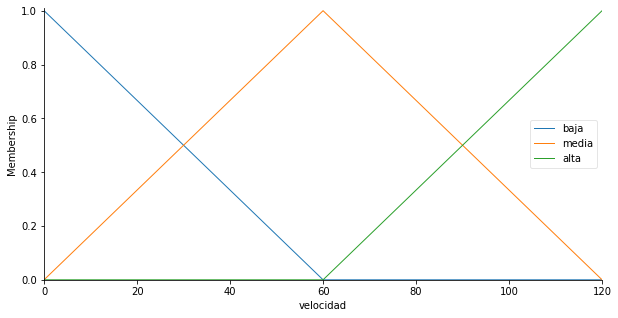

In [3]:
velocidad_ = ctrl.Antecedent(np.arange(0,121,1),'velocidad')
velocidad_['baja'] = fuzz.trimf(velocidad_.universe, [0, 0, 60])
velocidad_['media'] = fuzz.trimf(velocidad_.universe, [0, 60, 120])
velocidad_['alta'] = fuzz.trimf(velocidad_.universe, [60, 120, 120])
velocidad_.view()

Aclaración: agregué la función distancia solo para probar y agregar una variable pero no es necesario

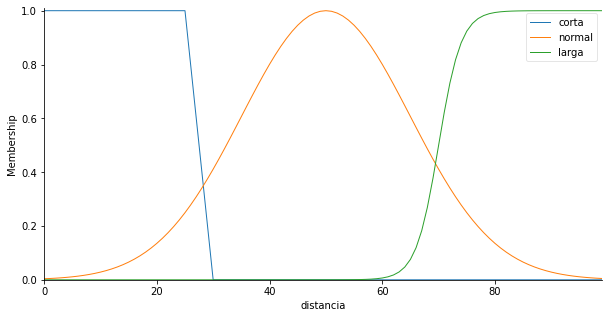

In [4]:
distancia_ = ctrl.Antecedent(np.arange(0,100,1), 'distancia')
distancia_['corta'] = fuzz.trapmf(distancia_.universe, [0, 0, 25, 30])
distancia_['normal'] = fuzz.gaussmf(distancia_.universe, 50, 15)
distancia_['larga'] = fuzz.sigmf(distancia_.universe, 70, 0.5)
distancia_.view()

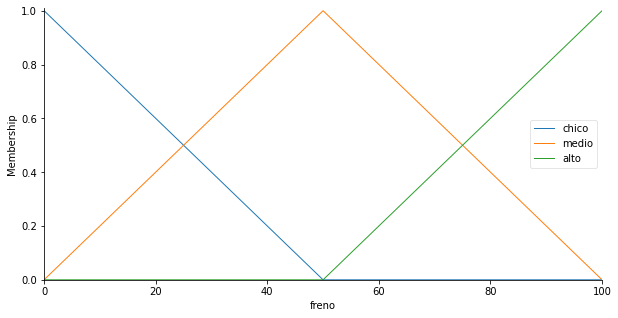

In [5]:
freno_ = ctrl.Antecedent(np.arange(0,101, 1), 'freno')
freno_['chico'] = fuzz.trimf(freno_.universe, [0, 0, 50])
freno_['medio'] = fuzz.trimf(freno_.universe, [0, 50, 100])
freno_['alto'] = fuzz.trimf(freno_.universe, [50, 100, 100])
freno_.view()

Estime la fuerza de frenado que debe aplicado un automovil, dada la distancia a D al próximo vehículo y la velocidad V del propio movil.

En este paso, definiremos los rangos y las funciones de pertenencia de las variables de entrada y salida.

In [0]:
########## ENTRADAS ########################
distancia = np.arange(0,101,1)
velocidad = np.arange(0,121,1)
#distancia
distancia_corta = fuzz.trapmf(distancia, [0, 0, 25, 30])
distancia_normal = fuzz.gaussmf(distancia, 50, 15)
distancia_larga = fuzz.sigmf(distancia, 70, 0.5)
#velocidad
velocidad_baja = fuzz.trimf(velocidad, [0, 0, 60])
velocidad_media = fuzz.trimf(velocidad, [0, 60, 120])
velocidad_alta = fuzz.trimf(velocidad, [60, 120, 120])

########## SALIDA ########################
freno = np.arange(0,101, 1)
#freno
freno_chico = fuzz.trimf(freno, [0, 0, 50])
freno_medio = fuzz.trimf(freno, [0, 50, 100])
freno_alto = fuzz.trimf(freno, [50, 100, 100])


Asociar las categorías a las funciones de pertenencia y definir la entrada del sistema. 

PD: utilizo la variable distancia y la seteo como baja (en el ejercicio es fija, pero para utilizar dos variables).

In [7]:
def categoria_dist(dist_entrada):
  distancia_cat_corta = fuzz.interp_membership(distancia, distancia_corta, dist_entrada)
  distancia_cat_normal = fuzz.interp_membership(distancia, distancia_normal, dist_entrada)
  distancia_cat_larga = fuzz.interp_membership(distancia, distancia_larga, dist_entrada)
  return dict(corta = distancia_cat_corta, normal = distancia_cat_normal, larga = distancia_cat_larga)

def categoria_velo(velo_entrada):
  velocidad_cat_baja = fuzz.interp_membership(velocidad, velocidad_baja, velo_entrada)
  velocidad_cat_media = fuzz.interp_membership(velocidad, velocidad_media, velo_entrada)
  velocidad_cat_alta = fuzz.interp_membership(velocidad, velocidad_alta, velo_entrada)
  return dict(baja = velocidad_cat_baja, media = velocidad_cat_media, alta = velocidad_cat_alta)

dist_entrada = categoria_dist(2)
velo_entrada = categoria_velo(45)

print("Distancia:", dist_entrada)
print("Velocidad:", velo_entrada)

Distancia: {'corta': 1.0, 'normal': 0.005976022895005943, 'larga': 1.71390843154201e-15}
Velocidad: {'baja': 0.25, 'media': 0.75, 'alta': 0.0}


Determinar las reglas:

IF Velocity is low, THEN Braking force is small.

IF Velocity is medium, THEN Braking force is medium.

IF Velocity is high, THEN Braking force is large.

PD: en la implementación puse un AND con distancia corta para realizar el caso de la consigna (pero tampoco es necesario, estoy haciendo una AND con un 1)

In [0]:
rule1 = np.fmin(dist_entrada['corta'], velo_entrada['baja'])
rule2 = np.fmin(dist_entrada['corta'], velo_entrada['media'])
rule3 = np.fmin(dist_entrada['corta'], velo_entrada['alta'])

Aplicar el operador de Mamdami


In [0]:
imp1 = np.fmin(rule1,freno_chico)
imp2 = np.fmin(rule2,freno_medio)
imp3 = np.fmin(rule3,freno_alto)

Quedarse con los máximos de las salidas.


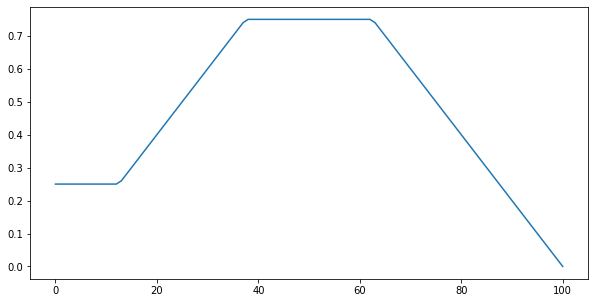

In [10]:
final_membership = np.fmax(imp1, np.fmax(imp2,imp3))
plot(final_membership)

Desfuzificar utilizando centroide.

In [11]:
resultado_freno = fuzz.defuzz(freno, final_membership , 'centroid')
print(resultado_freno)

48.51949347923337
